In [37]:
## importing libraries & data

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

np.random.seed(2)

In [2]:
path = "../Datasets"

import os
#Actual absolute path
cwd = os.getcwd()
#print(cwd)

In [3]:
# one level up directory. Datasets directory
os.chdir(path)
#Actual absolute path
cwd = os.getcwd()
#print(cwd)

In [4]:
# path file current dir + file name
path_file = cwd + '/creditcard.csv'
# print(path_file)

In [5]:
### EDA ###

# import dataset

dataset = pd.read_csv(path_file)
dataset.head()

# If the Class column is 1 the transaction is Fraudulent
# The IP Address was deleted from the dataset to preserve the anonymity

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
## Prepocessing 
from sklearn.preprocessing import StandardScaler

# Create a new copy
dataset2 = dataset
# Normalizace the Amount between -1,1
dataset2['normalizedAmount'] = StandardScaler().fit_transform(dataset2['Amount'].values.reshape(-1,1))

dataset2 = dataset2.drop(columns = ['Amount','Time'])
dataset2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [14]:
## Define the training data and the responde variable from the dataset
y = dataset2['Class']
X = dataset2.drop(columns = ['Class'])

In [17]:
# Generate the Split train/test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [18]:
X_train.shape

(199364, 29)

In [19]:
X_test.shape

(85443, 29)

In [20]:
# convert split sets to arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [39]:
### Deep Neural Network

# import keras layers, optimizer & callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
# Create DNN model
dnn_model = Sequential()

# First stage of Dense layers
dnn_model.add(Dense(units=16, input_dim=29,activation='relu'))
dnn_model.add(Dense(units=24, activation='relu'))

# Dropout to avoid oferfitting
dnn_model.add(Dropout(rate=0.4))

# Second stage of Dense layers
dnn_model.add(Dense(units=20,activation='relu'))
dnn_model.add(Dense(units=24,activation='relu'))
# Last layer with sigmoid activation. Binary decision
dnn_model.add(Dense(units=1,activation='sigmoid'))

#Summary the model
dnn_model.summary() 


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_20 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_22 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [50]:
### Training ###

# Define the compile trainning params
dnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
# train the model
dnn_model.fit(X_train, 
              y_train, 
              batch_size= 15,
              epochs = 5)

Epoch 1/5
199364/199364 [==============================] - 15s 76us/sample - loss: 0.0038 - acc: 0.9993
Epoch 2/5
199364/199364 [==============================] - 16s 80us/sample - loss: 0.0036 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 16s 81us/sample - loss: 0.0034 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 16s 81us/sample - loss: 0.0032 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 15s 77us/sample - loss: 0.0032 - acc: 0.9994


In [54]:
## DNN model evaluation
score = dnn_model.evaluate(X_test,y_test)

85443/85443 [==============================] - 2s 18us/sample - loss: 0.0039 - acc: 0.9994


In [55]:
# Print eval result 
print(score)

[0.003928133984745635, 0.99939144]


In [ ]:
## Metrics -->

# Accuracy: (TRUE Positives + TRUE Negatives) / Total
# Precision: TRUE Positives / (TRUE Positives + FALSE Positives)
# Specificity: TRUE Negatives / (FALSE Positives + TRUE Negatives)
# Recall: TRUE Positives / (TRUE Positives + FALSE Negatives)
# F1-score:

In [75]:
# Getting the prediction from the test dataset
y_pred = dnn_model.predict(X_test).round()
# convert array to dataframe
y_test = pd.DataFrame(y_test)

In [78]:
# Evaluate the quality of the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cnf_matrix = confusion_matrix(y_test, y_pred)

In [79]:
# Accuracy score
acc = accuracy_score(y_test, y_pred)

In [80]:
# precision score (When is 0 and should be 1 and the other way round)
pre = precision_score(y_test, y_pred)

In [81]:
# recall score
rec = recall_score(y_test, y_pred)

In [82]:
f1 = f1_score(y_test, y_pred)

In [83]:
# Metrics
results = pd.DataFrame([['Deep Neural Network', acc, pre, rec, f1]],
              columns = ['Model','Accuracy','Precision','Recall','F1 score'])

results

,Model,Accuracy,Precision,Recall,F1 score
0,Deep Neural Network,0.999391,0.836879,0.802721,0.819444


Accuracy 0.9994


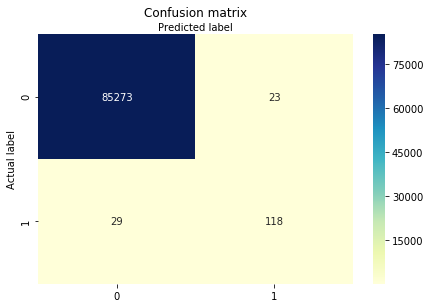

In [84]:
# Plot the confussion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy %0.4f" % accuracy_score(y_test, y_pred))

In [87]:
## Round 2: Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

In [89]:
# set parameters of RF and Fit
random_forest = RandomForestClassifier(n_estimators = 100)

classifier = RandomForestClassifier(random_state=0, n_estimators = 100,
                                   criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [90]:
# Evaluating Test set
y_pred = classifier.predict(X_test)

In [91]:
# Calculation of metrics

# Accuracy score
acc = accuracy_score(y_test, y_pred)

# precision score (When is 0 and should be 1 and the other way round)
pre = precision_score(y_test, y_pred)

# recall score
rec = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

In [92]:
# Metrics 
rf_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, pre, rec, f1]],
              columns = ['Model','Accuracy','Precision','Recall','F1 score'])

In [93]:
# Showing the comparizon between the Models

results = results.append(rf_results, ignore_index = True)

results 

,Model,Accuracy,Precision,Recall,F1 score
0,Deep Neural Network,0.999391,0.836879,0.802721,0.819444
1,"Random Forest (n=100, GSx2 + Entropy)",0.999520,0.941667,0.768707,0.846442


In [94]:
## Round 3: Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [95]:
# set parameters of DecisionTree and Fit
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
# Evaluating Test set
y_pred = classifier.predict(X_test)

In [97]:
# Calculation of metrics

# Accuracy score
acc = accuracy_score(y_test, y_pred)

# precision score (When is 0 and should be 1 and the other way round)
pre = precision_score(y_test, y_pred)

# recall score
rec = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

In [99]:
# Metrics 
dt_results = pd.DataFrame([['Decision Trees', acc, pre, rec, f1]],
              columns = ['Model','Accuracy','Precision','Recall','F1 score'])

In [100]:
# Showing the comparizon between the Models

results = results.append(dt_results, ignore_index = True)

results 

,Model,Accuracy,Precision,Recall,F1 score
0,Deep Neural Network,0.999391,0.836879,0.802721,0.819444
1,"Random Forest (n=100, GSx2 + Entropy)",0.999520,0.941667,0.768707,0.846442
2,Decision Trees,0.999216,0.785714,0.748299,0.766551


In [104]:
# Round 4: BALANCING THE DATASET

# Splitting into train and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 0)

In [105]:
# Round 4 

#BALANCING THE DATASET:

# # To Avoid the skewed on the total 

# Counting and watching the Y_train distribution 
y_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [106]:
# The expecting distribution to avoid a Bias is to have a 50/50 (0/1)
#This balancing ensure that the model is accuracy

#pos and neg index values
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
#Create random index selection
random.seed(0)
# random select index record up to the same size of lower index
higher = np.random.choice(higher, size = len(lower))
# select the lower index and convert to a numpy array
lower = np.asarray(lower)
# create the new index as a combination 
new_indexes = np.concatenate((lower,higher))

# Reselect the X_train, y_train dataset using the new indexes
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

In [107]:
# checking the balancing of the training Set

#Counting and watching the Y_train distribution 
y_train.value_counts()

1    345
0    345
Name: Class, dtype: int64

In [108]:
# train the DNN model 
dnn_model.fit(X_train, 
              y_train, 
              batch_size= 15,
              epochs = 5)

Epoch 1/5
690/690 [==============================] - 0s 109us/sample - loss: 0.2002 - acc: 0.9319
Epoch 2/5
690/690 [==============================] - 0s 94us/sample - loss: 0.1285 - acc: 0.9435
Epoch 3/5
690/690 [==============================] - 0s 88us/sample - loss: 0.1055 - acc: 0.9493
Epoch 4/5
690/690 [==============================] - 0s 87us/sample - loss: 0.1052 - acc: 0.9493
Epoch 5/5
690/690 [==============================] - 0s 108us/sample - loss: 0.0964 - acc: 0.9536


In [109]:
## DNN model evaluation
score = dnn_model.evaluate(X_test,y_test)

85443/85443 [==============================] - 1s 16us/sample - loss: 0.0857 - acc: 0.9971


In [110]:
# Print eval result 
print(score)

[0.08572872194509909, 0.99707407]


In [112]:
## Metrics -->

# Accuracy: (TRUE Positives + TRUE Negatives) / Total
# Precision: TRUE Positives / (TRUE Positives + FALSE Positives)
# Specificity: TRUE Negatives / (FALSE Positives + TRUE Negatives)
# Recall: TRUE Positives / (TRUE Positives + FALSE Negatives)
# F1-score:

In [113]:
# Getting the prediction from the test dataset
y_pred = dnn_model.predict(X_test).round()
# convert array to dataframe
y_test = pd.DataFrame(y_test)

In [114]:
# Evaluating Test set
y_pred = classifier.predict(X_test)

In [116]:
# Calculation of metrics

# Accuracy score
acc = accuracy_score(y_test, y_pred)

# precision score (When is 0 and should be 1 and the other way round)
pre = precision_score(y_test, y_pred)

# recall score
rec = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

In [117]:
# Metrics 
dnn_results = pd.DataFrame([['Deep Neural Network (Undersampling & balanced)', acc, pre, rec, f1]],
              columns = ['Model','Accuracy','Precision','Recall','F1 score'])

In [118]:
# Showing the comparizon between the Models

results = results.append(dnn_results, ignore_index = True)

results 

,Model,Accuracy,Precision,Recall,F1 score
0,Deep Neural Network,0.999391,0.836879,0.802721,0.819444
1,"Random Forest (n=100, GSx2 + Entropy)",0.999520,0.941667,0.768707,0.846442
2,Decision Trees,0.999216,0.785714,0.748299,0.766551
3,Deep Neural Network (Undersampling & balanced),0.999216,0.785714,0.748299,0.766551


## Final Remarks

On this case study we try to create a model for the detection of Fraudulent Card transaction. We tried severals Models and the best of thoughs model was the Random Forest model with this particular Metrics score:

- Accuracy score: 0.999391
- Precision score: 0.836879
- Recall score: 0.802721
- F1 score: 0.819444


